# 1. Importing the required libraries

In [1]:
#importing the libraries for matrix and dataframe handling, plotting, etc 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#miscellaneous libraries used
import re
import itertools
from collections import Counter
from sys import maxsize
import math
import warnings
warnings.filterwarnings("ignore")

#importing the NLP and Data Visualisation related libraries
import string
from string import ascii_letters, punctuation, digits
import nltk
# nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
product_df = pd.read_csv('flipkart_data.csv', sep=',')

In [3]:
# Check first 5 records
product_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
# Check last 5 records
product_df.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
19994,7415e1a421fb468d25a5ea56350f44be,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5TXEZ2RT8N,727.0,582.0,"[""http://img6a.flixcart.com/image/sticker/p/a/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


In [5]:
product_df['description'] = product_df['description'].astype(str)

From below, we can see that our dataset consists of 20k datapoints with each having approximately 15 columns.

In [6]:
# Check dimension of the dataframe
product_df.shape

(19999, 15)

In [7]:
product_df.describe()

,retail_price,discounted_price
count,19921.000000,19921.000000
mean,2979.280408,1973.450680
std,9009.859380,7333.766864
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [8]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  19999 non-null  object 
 1   crawl_timestamp          19999 non-null  object 
 2   product_url              19999 non-null  object 
 3   product_name             19999 non-null  object 
 4   product_category_tree    19999 non-null  object 
 5   pid                      19999 non-null  object 
 6   retail_price             19921 non-null  float64
 7   discounted_price         19921 non-null  float64
 8   image                    19996 non-null  object 
 9   is_FK_Advantage_product  19999 non-null  bool   
 10  description              19999 non-null  object 
 11  product_rating           19999 non-null  object 
 12  overall_rating           19999 non-null  object 
 13  brand                    14135 non-null  object 
 14  product_specifications

#### Dropping the NaN's and duplicate Product Descriptions

Information about the NaN values over the entire dataset is given below.

In [9]:
print(product_df.isna().sum())

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   0
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64


The Seaborn heatmap below helps us in visualising the 'NaN' values in the entire dataset. It can be clearly observed that the columns, 'brand', 'retail_price' and 'discounted_price' have a significant amount of NaN values. As these columns do not have much contribution in helping us predict the category of a product, these 'NaN' datapoints are dropped from the dataset.

<AxesSubplot:>

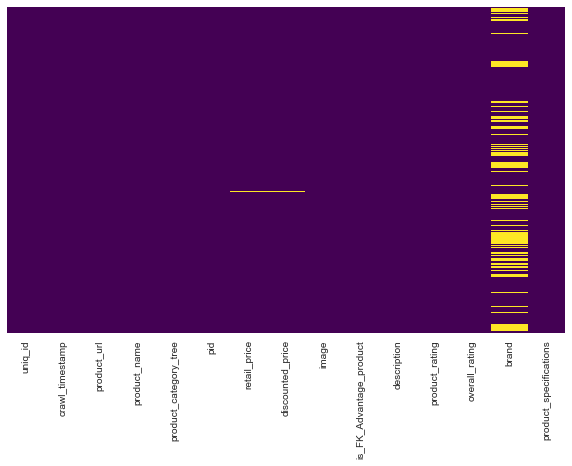

In [10]:
# Heatmap showing the distribution of all the Nan's throughout the data
plt.figure(figsize=(10,6))
sns.heatmap(product_df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

As we have to predict the category that a particular product belongs to, from the given dataset, only description column gives us useful details according to which we can predict its category. Hence, the datapoints having description or product_category_tree points as NaN cannot be included in our dataset and therefore, they are removed. Also, datapoints having duplicate descriptions are removed as well.

In [10]:
# Keeping only those datapoints whose description is not NaN
products = product_df[product_df['description'].notna()]

# Keeping only those datapoints product_category_tree is not NaN
products = product_df[product_df['product_category_tree'].notna()]

# Dropping the datapoints with duplicate descriptions
products = product_df.drop_duplicates("description",keep='first', inplace=False, ignore_index=True)
products = product_df.reset_index(drop=True)
products.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# 2. Exploratory Data Analysis

## 2.1 Dropping the unnecessary columns

As mentioned earlier, only description and product_category_tree are of utmost importance in predicting the category of a product, the rest of the columns which do not contribute any meaning to our problem statement are removed. However, some columns like product_name and brand are still kept for further visualisation of the data.

In [11]:
# List of all the columns in the dataset
print(product_df.columns.tolist())

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']


In [12]:
# Dropping the columns which do not add much meaning to our problem statement
product_df = product_df.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'pid', 'retail_price', 'discounted_price',
               'image', 'product_rating', 'overall_rating', 'is_FK_Advantage_product', 'product_specifications'], axis=1)

In [13]:
product_df.head(5)

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons


## 2.2 Lineplot of Products of a specific Brand

The below lineplot helps us visualise the frequency of all the products of a particular brand that is available on Flipkart.

In [14]:
# Creating a temporary Dataframe 
temp_df = product_df.copy(deep=True)

# Delete the rows and having brand as NaN values 
temp_df = temp_df[temp_df['brand'].notna()]
temp_df

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19994,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19995,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


In [15]:
temp_df.shape

(14135, 4)

In [16]:
# Creating a list of all the unique brand names
brands_df = list(dict.fromkeys(list(temp_df.loc[:, 'brand'].values)))

brand_keys = [] #corresponds to the unique brand names
brand_freq = [] #corresponds to the count of the product for a brand

for brand in brands_df:
    # Getting the count for that brand
    count = np.sum(temp_df.loc[:, 'brand'].values == brand)
    if count>=10:
        brand_keys.append(brand)
        brand_freq.append(count)

In [17]:
max_count = max(brand_freq)
idx = brand_freq.index(max_count)
print("The brand having maximum amount of products on Flipkart is {} with {} many products".format(brand_keys[idx],max_count))

The brand having maximum amount of products on Flipkart is Allure Auto with 469 many products


The brand having maximum amount of products on Flipkart is Allure Auto with 469 many products
From the lineplot below, we can see that most of the brands have less than 100 of their products on Flipkart while some brands have around 300 of their products on Flipkart.

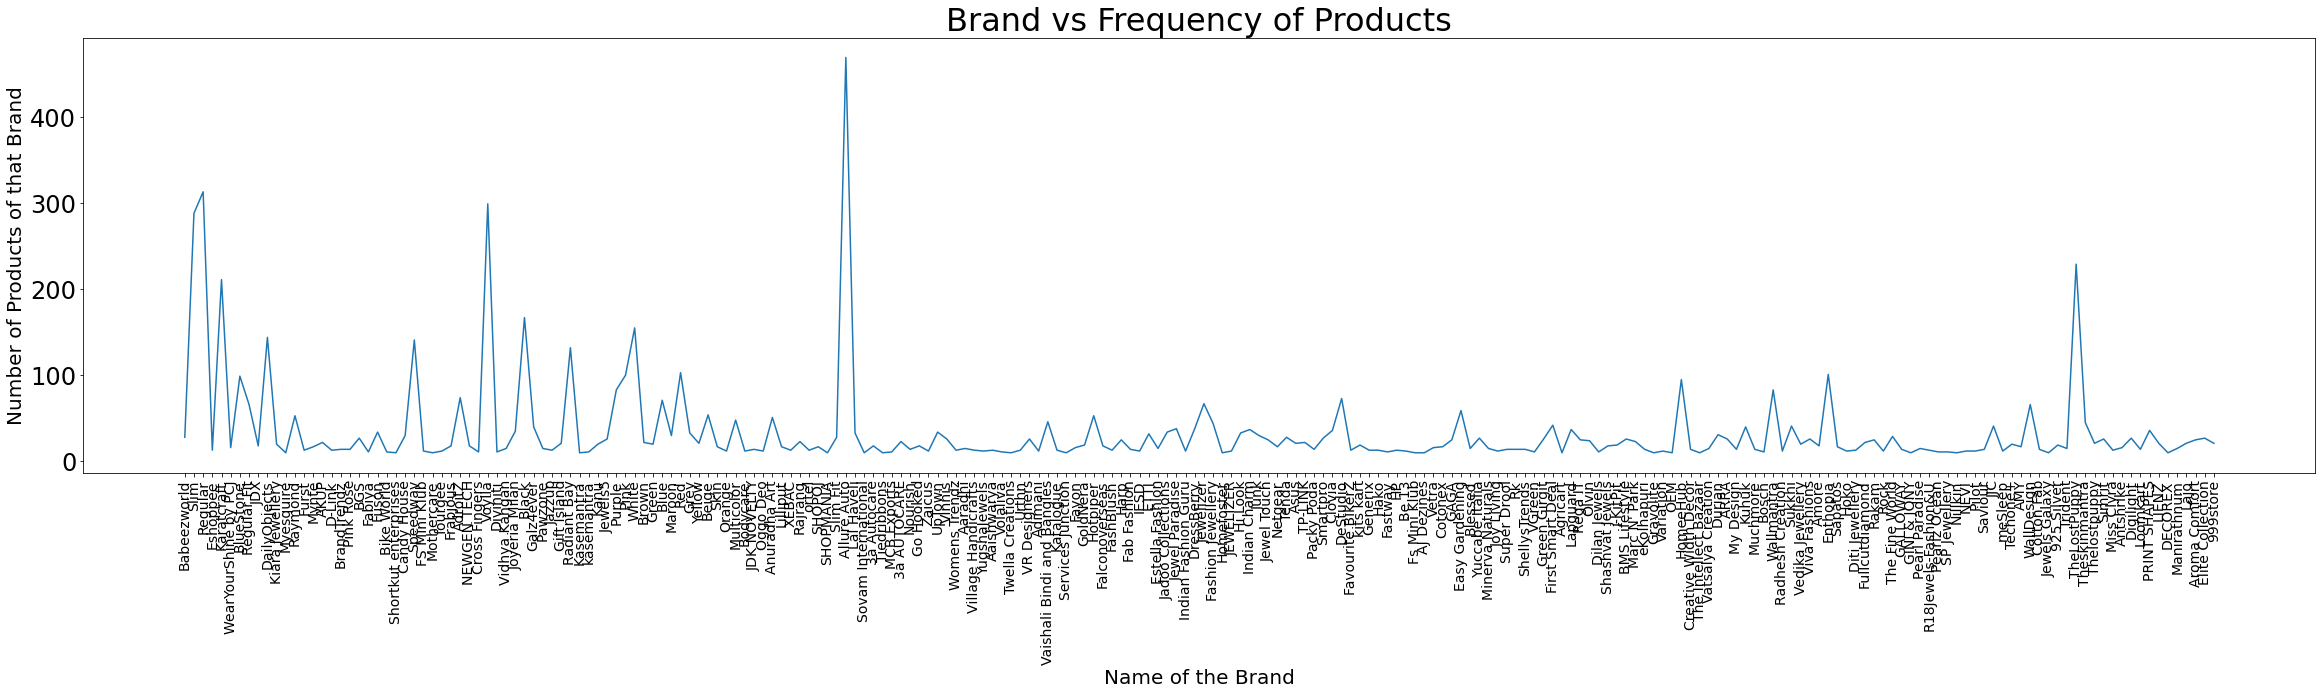

In [18]:
plt.figure(figsize=(40,8))
plt.title("Brand vs Frequency of Products", fontsize=32)
plt.ylabel("Number of Products of that Brand", fontsize=20)
plt.xlabel("Name of the Brand", fontsize=20)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=24)
sns.lineplot(x=brand_keys, y=brand_freq)
plt.show()

### 2.3 Bar Graph of the most common words in Product Description

A bar graph of the 40 most frequent words occuring in the Product Description is made. This has helped us in adding some words to our stopwords list like shipping, delivery, flipkart, etc (which are then removed) as they do not have much meaning/contribution in the prediction of product category.

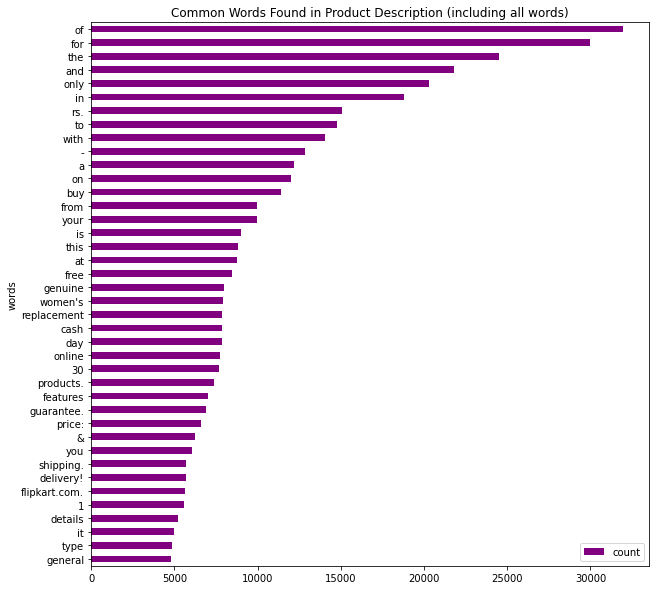

In [19]:
def most_frequent_words(description):
    
    for i in range(len(description)):
        
        description[i] = description[i].lower().split()

    all_words = list(itertools.chain(*description))
    word_counts = Counter(all_words)

# Creating a pandas dataframe of the 40 most common words in the dataset
    clean_description = pd.DataFrame(word_counts.most_common(40),columns=['words', 'count'])
    
    return clean_description

description = product_df["description"].tolist()
most_common_description = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))
# Plotting the bargraph in decreasing sorted order
most_common_description.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="purple")

ax.set_title("Common Words Found in Product Description (including all words)")
plt.show()


### 2.4 Count of the different Product Categories in the Unfiltered Data

Through the code snippet below, we are analyzing the different Product Categories and if they have more than 10 products, we are printing them as shown below.

In [20]:
categories_in_df = list(dict.fromkeys(list(product_df.loc[:,'product_category_tree'].values)))
print("The unique Product Categories in this dataset are {}".format(len(categories_in_df)))

for category in categories_in_df:
    count = np.sum(product_df.loc[:, 'product_category_tree'].values == category)
    if(count >= 10):
        print(category, "\t", count)

The unique Product Categories in this dataset are 6466
["Footwear >> Women's Footwear >> Casual Shoes >> Boots"] 	 118
["Clothing >> Men's Clothing >> Jeans >> Reckler Jeans"] 	 20
["Jewellery >> Rings"] 	 710
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Shilpkala Tops"] 	 14
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> TeeMoods Tops"] 	 16
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> SFDS Tops"] 	 10
["Clothing >> Kids' Clothing >> Girls Wear >> Dresses & Skirts >> Dresses >> Herberto Dresses"] 	 10
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Ozel Studio Tops"] 	 10
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Tapyti Tops"] 	 12
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Cation Tops"] 	 39
["Footwear >> Women's Footwear >> Flats"] 	 87
["Mobiles & Accessorie

["Computers >> Laptop Accessories >> Adapters >> Smartpro Adapters >> Smartpro 19.5v,3.9a Replacement Charger for Vaio..."] 	 25
["Home Decor & Festive Needs >> Wall Decor & Clocks >> Clocks >> Wall Clocks >> Blacksmith Wall Clocks"] 	 20
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> Fastway Cases & Covers"] 	 11
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"] 	 332
["Home Improvement >> Lawn & Gardening >> Plants >> Plant Seeds"] 	 20
["Computers >> Laptop Accessories >> Batteries >> Lapguard Batteries"] 	 31
["Computers >> Laptop Accessories >> Batteries >> Rega IT Batteries"] 	 14
["Computers >> Laptop Accessories >> Batteries >> HP Batteries"] 	 10
["Watches >> Wrist Watches >> Fastrack Wrist Watches"] 	 20
["Watches >> Wrist Watches >> Sonata Wrist Watches"] 	 56
["Watches >> Wrist Watches >> Times Wrist Watches"] 	 23
["Watches >> Wrist Watches >> Flippd Wrist Watches"] 	 16
["Watches >> Wrist Watches >> Max

["Clothing >> Women's Clothing >> Ethnic Wear >> Kurtas & Kurtis >> Kurtis >> Shopping Karega Kurtis"] 	 11
["Clothing >> Women's Clothing >> Ethnic Wear >> Kurtas & Kurtis >> Kurtis >> Shop Rajasthan Kurtis"] 	 16
["Home Furnishing >> Living"] 	 18
["Pens & Stationery >> Office Supplies >> AMY Office Supplies"] 	 17
["Clothing >> Men's Clothing >> Shirts >> Casual & Party Wear Shirts >> Orange Valley Casual & Party Wear Shirts"] 	 10
["Clothing >> Women's Clothing >> Maternity Wear >> Ethnic Wear >> Kurtas & Kurtis >> Cotton Fab Kurtas & Kurtis >> Cotton Fab Printed Women's Maternity Wear Kurti ..."] 	 11
["Clothing >> Men's Clothing >> Winter & Seasonal Wear >> Sweaters >> Club York Sweaters"] 	 12
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> TheLostPuppy Cases & Covers"] 	 229
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> Theskinmantra Cases & Covers"] 	 43
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> Thelostpuppy Case

From above, we can clearly see that there are many redundant Product Categories as in the Product Category Tree, a new branch arises for the Brand Name. In the code snippet below, the punctuations in the product_category_tree column are removed and only the FIRST CATEGORY is considered as the primary category for Product Categorization. This is done so in order to have significant datapoints for each category to train a better model.

In [21]:
primary_category = product_df["product_category_tree"].tolist()

# Lowercasing the categories to prevent duplicate categories and removal of punctuations like ">>", etc
for i in range(len(primary_category)):
    primary_category[i] = primary_category[i].lower()
    primary_category[i] = primary_category[i].replace('["',"")
    primary_category[i] = primary_category[i].replace('"]',"")
    primary_category[i] = primary_category[i].replace(" ","")
    primary_category[i] = primary_category[i].split(">>") 
    primary_category[i] = primary_category[i][0]

print(primary_category)
print(len(primary_category))

['clothing', 'furniture', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'furniture', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'pens&stationery', 'clothing', 'furniture', 'footwear', 'clothing', 'furniture', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'beautyandpersonalcare', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'pens&stationery', 'pens&stationery', 'pens&stationery', 'clothing', 'pens&stationery', 'clothing', 'bags,wallets&belts', 'clothing', 'footwear', 'homedecor&festiveneeds', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsummersiblesinglephasepumpcontroller...', "masarasolidwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", 'tools&hardw

The length of the unique Product Categories after some filtering is 265


<AxesSubplot:title={'center':'Number of products in categories v/s Category'}, xlabel='Product Categories', ylabel='Frequency'>

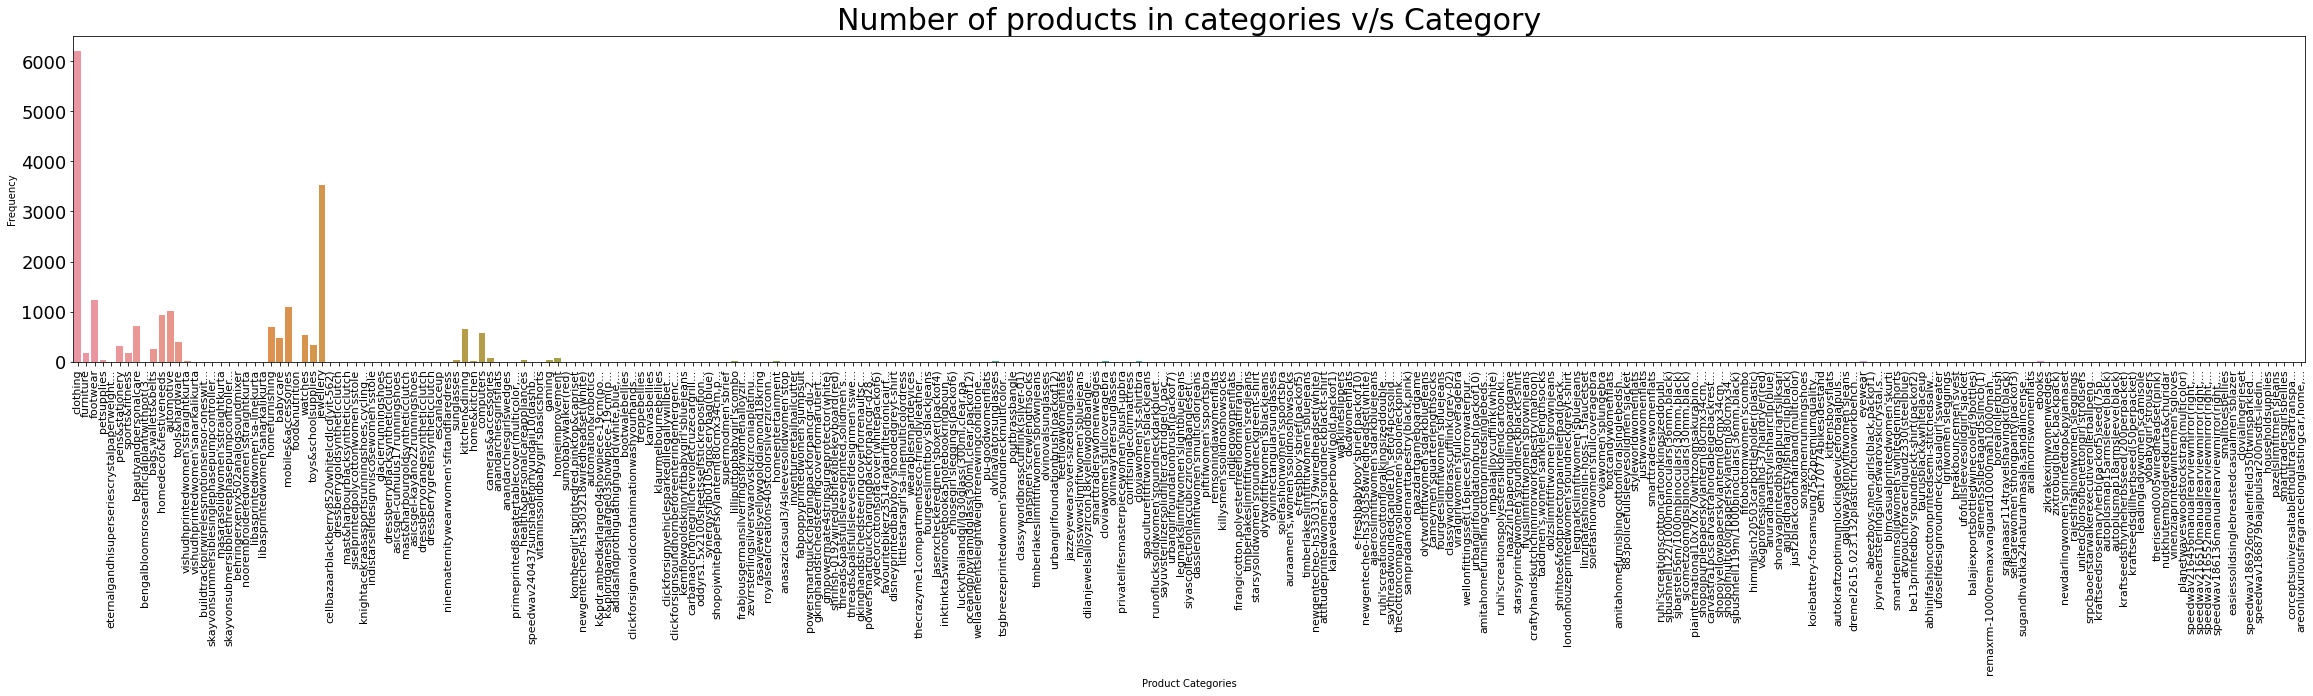

In [22]:
# Filtering out some of the categories with count less than 10 
primary_category_count = Counter(primary_category)
print("The length of the unique Product Categories after some filtering is {}".format(len(primary_category_count)))

all_categories_temp=[]
count_temp=[]

for keys,vals in primary_category_count.items():
    all_categories_temp.append(keys)
    count_temp.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories_temp, y=count_temp)

From the above bargraph, we can clearly see that there is a lot of noise in the dataset as only the brand/description is sometimes mentioned in the Product Category. To visualise the relevant classes, a bargraph is plotted below that shows only those Product Categories which have at least 10 products

<AxesSubplot:title={'center':'Number of products in categories v/s Category'}, xlabel='Product Categories having frequency at least 10', ylabel='Frequency'>

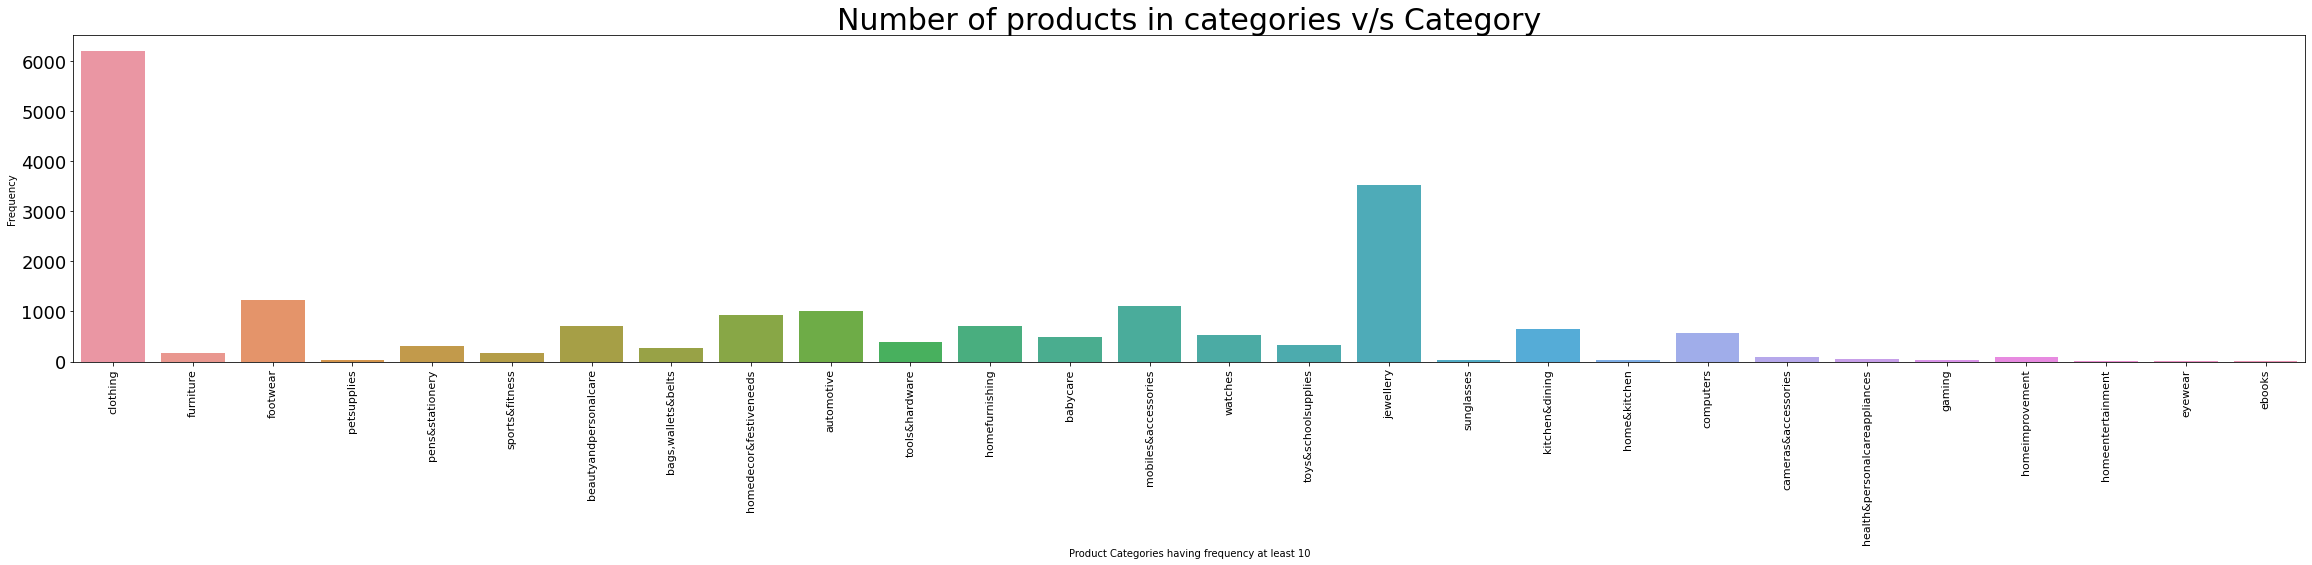

In [23]:
all_categories=[]
count=[]

for keys,vals in primary_category_count.items():
  # Choosing only those categories which have at least 10 producrs
  if(vals>=10):
    all_categories.append(keys)
    count.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories having frequency at least 10")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories, y=count)

### 2.5 Combining the redundant categories

From the above bargraph, we can see that there are some classes which can be grouped together like sunglasses and eyewear and homefurnishing and home&kitchen. This will also help us in increasing the datapoints for each category in order to train a better model.

In [24]:
revised_categories = [None]*len(primary_category)

for i in range(len(primary_category)):
    
    if primary_category[i]=="homeimprovement" or primary_category[i]=="homedecor&festiveneeds" or primary_category[i]=='home&kitchen' or primary_category[i]=="kitchen&dining" or primary_category[i]=="homefurnishing" or primary_category[i]=="furniture" or primary_category[i]=="homeentertainment":
        revised_categories[i] = 'homefurnishing/kitchen'
    elif primary_category[i]=='pens&stationery':
        revised_categories[i] = 'toys&schoolsupplies'
    elif primary_category[i]=='gaming' or primary_category[i]=='cameras&accessories' or primary_category[i]=='computers' or primary_category[i]=="mobiles&accessories":
        revised_categories[i]='electronics'
    elif primary_category[i]=='health&personal care appliances' or primary_category[i]=='beautyandpersonalcare' or primary_category[i]=='eyewear' or primary_category[i]=='sunglasses' or primary_category[i]=='watches' or primary_category[i]=='bags,wallets&belts' or primary_category[i]=='health&personalcareappliances':
        revised_categories[i]='personalaccessories'
    else:
        revised_categories[i] = primary_category[i]

print("The length of the revised grouped categories are {}".format(len(Counter(revised_categories))))
print(revised_categories)

The length of the revised grouped categories are 250
['clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'homefurnishing/kitchen', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'personalaccessories', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'toys&schoolsupplies', 'toys&schoolsupplies', 'toys&schoolsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'personalaccessories', 'clothing', 'footwear', 'homefurnishing/kitchen', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsum

In [25]:
# Creating a new column in the dataframe which stores these revised grouped categories
product_df["primary_categories"] = revised_categories
product_df.head(10)

,product_name,product_category_tree,description,brand,primary_categories
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,eternalgandhisuperseriescrystalpaperweight...
6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear
9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing


In [26]:
temp_categories = list(dict.fromkeys(list(product_df.loc[:,'primary_categories'].values)))

considered_category = []
revised_category_count = {}
noise = {}
all_categories = {}

print("\n")
print("********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************")
print("\n")

for category in temp_categories:
    count = np.sum(product_df.loc[:, 'primary_categories'].values == category)
    all_categories[category]=count
    # A category is considered to be a main category only if the frequency of a product in that category is at least 10
    if(count>=10):
            print(category,count)
            revised_category_count[category] = count   
    else:
            noise[category] = count

for i in range(len(revised_categories)):
    
    if revised_categories[i] in revised_category_count:
        
        considered_category.append(1)
    else:
        considered_category.append(0)

print("\n")
print("********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************")
print("\n")
for keys,vals in noise.items():
    
      print(keys,vals)

print("\n")
print("********************* THE NOISE + PRIMARY CATEGORIES IN THE DATASET ARE AS FOLLOWS *************************")
print("\n")
for keys,vals in all_categories.items():
    
      print(keys,vals)



********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************


clothing 6198
homefurnishing/kitchen 2580
footwear 1227
petsupplies 30
toys&schoolsupplies 643
sports&fitness 166
personalaccessories 1598
automotive 1012
tools&hardware 391
babycare 482
electronics 1794
jewellery 3531
ebooks 15


********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************


eternalgandhisuperseriescrystalpaperweight... 1
bengalbloomsroseartificialplantwithpot(3... 1
vishudhprintedwomen'sstraightkurta 8
vishudhprintedwomen'sanarkalikurta 1
buildtrackpirwirelessmotionsensor-oneswit... 1
skayvonsummersiblesinglephasepumpcontroller... 1
masarasolidwomen'sstraightkurta 5
skayvonsubmersibblethreephasepumpcontroller... 1
behringerxenyx502analogsoundmixer 1
noorembroideredwomen'sstraightkurta 1
libasprintedwomen'sa-linekurta 1
libasprintedwomen'sanarkalikurta 1
food&nutrition 2
cellbazaarblackberry8520whitelcdlcd(yit-562) 1
dressberryg

### 2.6 Visualisation of the Noise + Primary Categories

<AxesSubplot:>

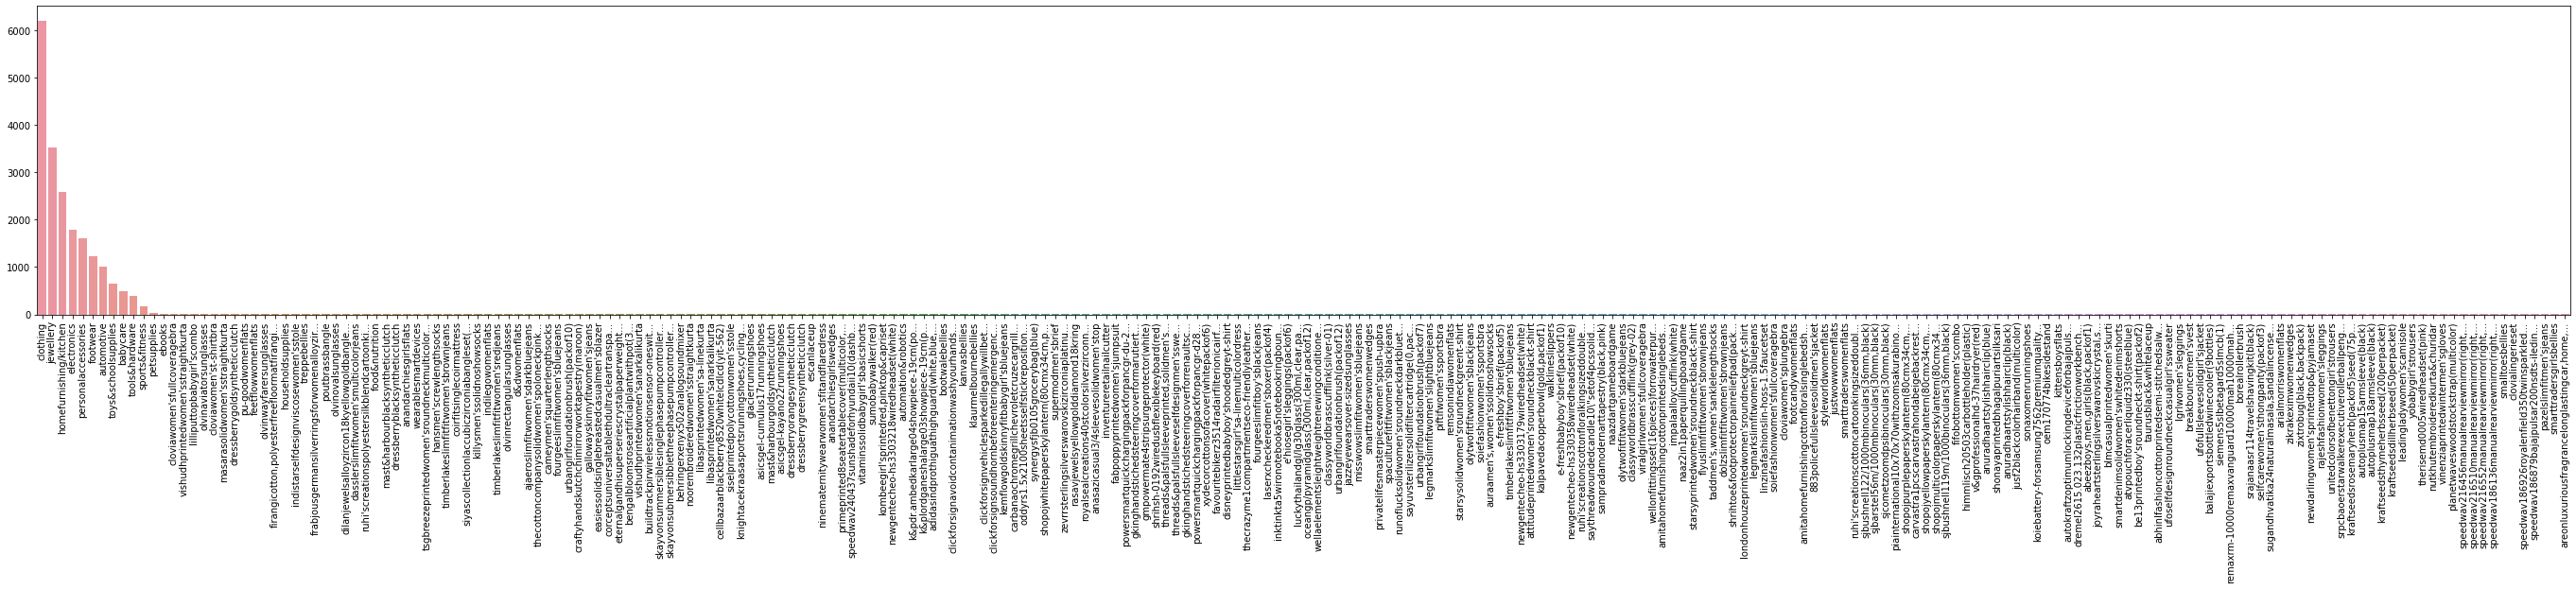

In [27]:
all_categories = dict(sorted(all_categories.items(), key=lambda item: item[1], reverse=True))

all_categories_keys = list(all_categories.keys())
all_categories_freq = list(all_categories.values())

fig = plt.figure(figsize = (48, 6))
plt.xticks(rotation=90)
sns.barplot(x=all_categories_keys ,y=all_categories_freq)

### 2.7 Visualisation of only Noise in the dataset

Noise in the dataset consists of all those Product Categories which have less than 10 products in them. From the bargraph below, we can clearly see that most of the noise in the dataset has only 1 product in its category and hence, it wasn't useful to let this noise pass through while training the model. Therefore, it is later removed from the dataset.

<AxesSubplot:>

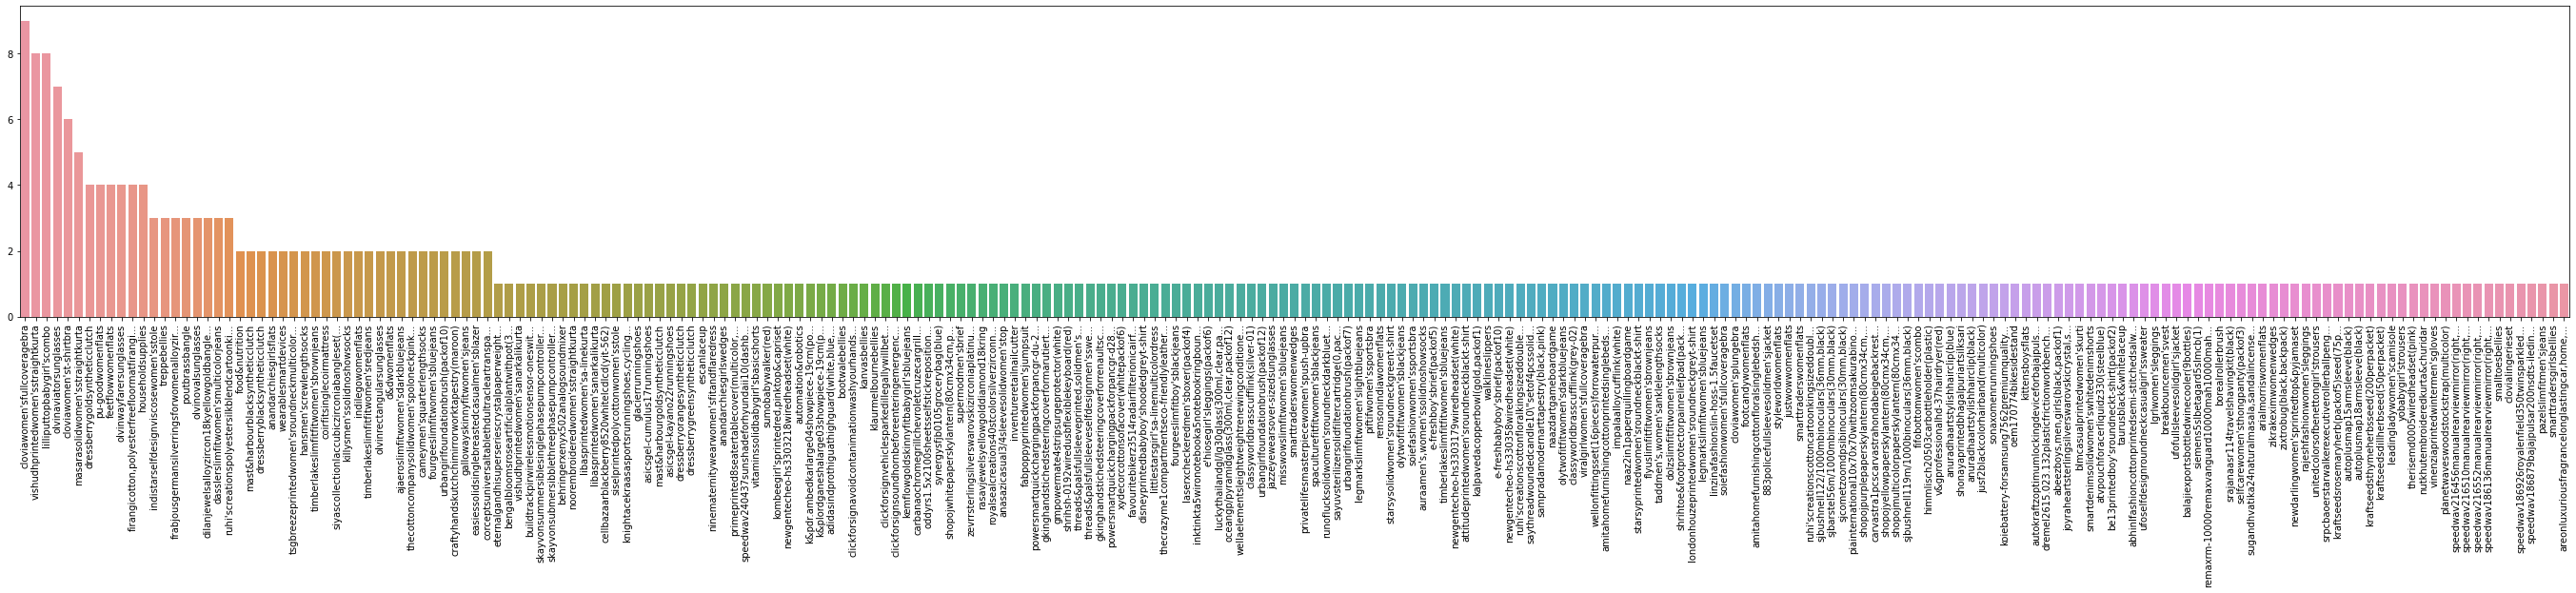

In [28]:
noise = dict(sorted(noise.items(), key=lambda item: item[1], reverse=True))

noise_keys = list(noise.keys())
noise_freq = list(noise.values())

fig = plt.figure(figsize = (48, 6))
plt.xticks(rotation=90)
sns.barplot(x=noise_keys ,y=noise_freq)

### 2.8 Frequency Plot of the revised categories

The Bargraph shown below shows the frequency of the product in each of the final classes (total classes = 13). These are also the classes into which the final Product Categorization is done. We can see that this dataset is heavily imbalanced with clothing category dominating the other categories by more than 50%.

<AxesSubplot:>

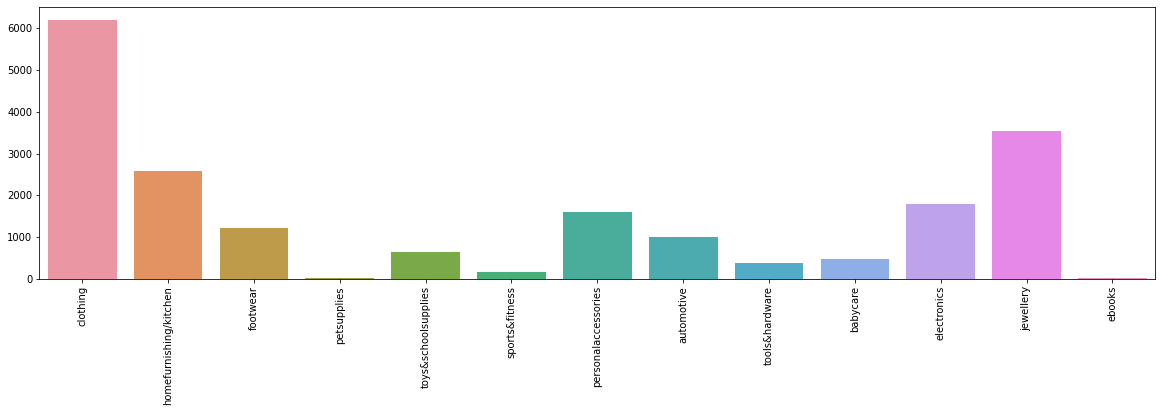

In [29]:
categories = list(revised_category_count.keys())
frequency = list(revised_category_count.values())

fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation=90)
sns.barplot(x=categories,y=frequency)

A main_category column is added to the dataset having binary values. Its value for a particular row is 1 if that product lies in any of the above mentioned 13 classes, otherwise it is 0.

In [30]:
product_df["main_category"] = considered_category
product_df.head(10)

,product_name,product_category_tree,description,brand,primary_categories,main_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,eternalgandhisuperseriescrystalpaperweight...,0
6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,1
9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1


### 2.9 Plotting the number of Brands per Category

From the graph generated below, we can see that the most variety of brands belongs to the home furnishing/ kitchen category.

<AxesSubplot:title={'center':'No of Brands vs Categories'}, xlabel='Categories', ylabel='No of Brands'>

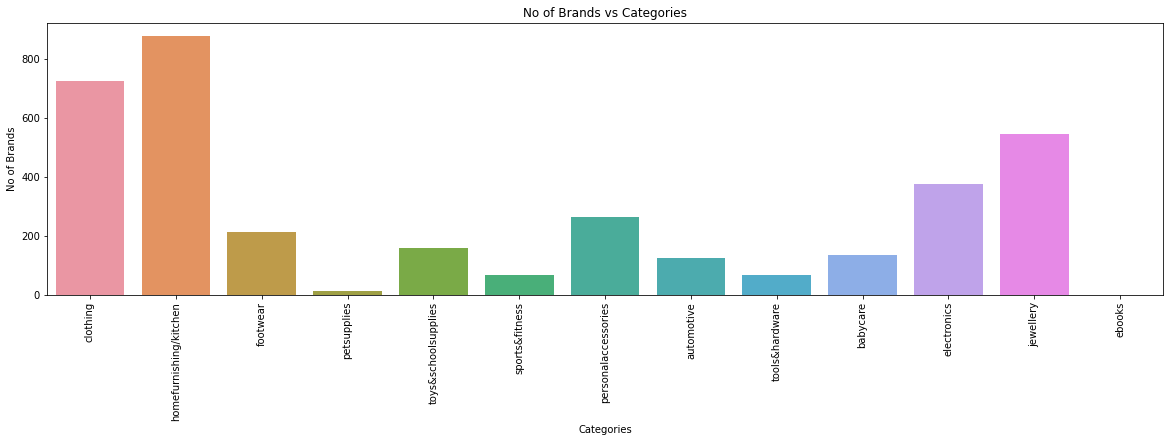

In [31]:
temp_df = product_df.copy(deep=True)
temp_df = temp_df[temp_df['brand'].notna()]
temp_df = temp_df[temp_df["main_category"]==1]

# List containing the revised categories
category_list = []
# List containing the number of brands corresponding to that category
brand_freq_list = []

for category in categories:
    df = temp_df[temp_df["primary_categories"]==category]
    category_brand_count = list(dict.fromkeys(list(df.loc[:,'brand'].values)))
    category_list.append(category)
    brand_freq_list.append(len(category_brand_count))

# Plotting the graph
fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("No of Brands")
plt.title("No of Brands vs Categories")
sns.barplot(x=category_list,y=brand_freq_list)

# 3. Sentiment Analysis

Sentiment analysis of the Product Description corresponding to each category. This is done by measuring the polarity of each product's description.

<AxesSubplot:title={'center':'Sentiment Analysis of Product Description'}, xlabel='primary_categories', ylabel='desc_pol'>

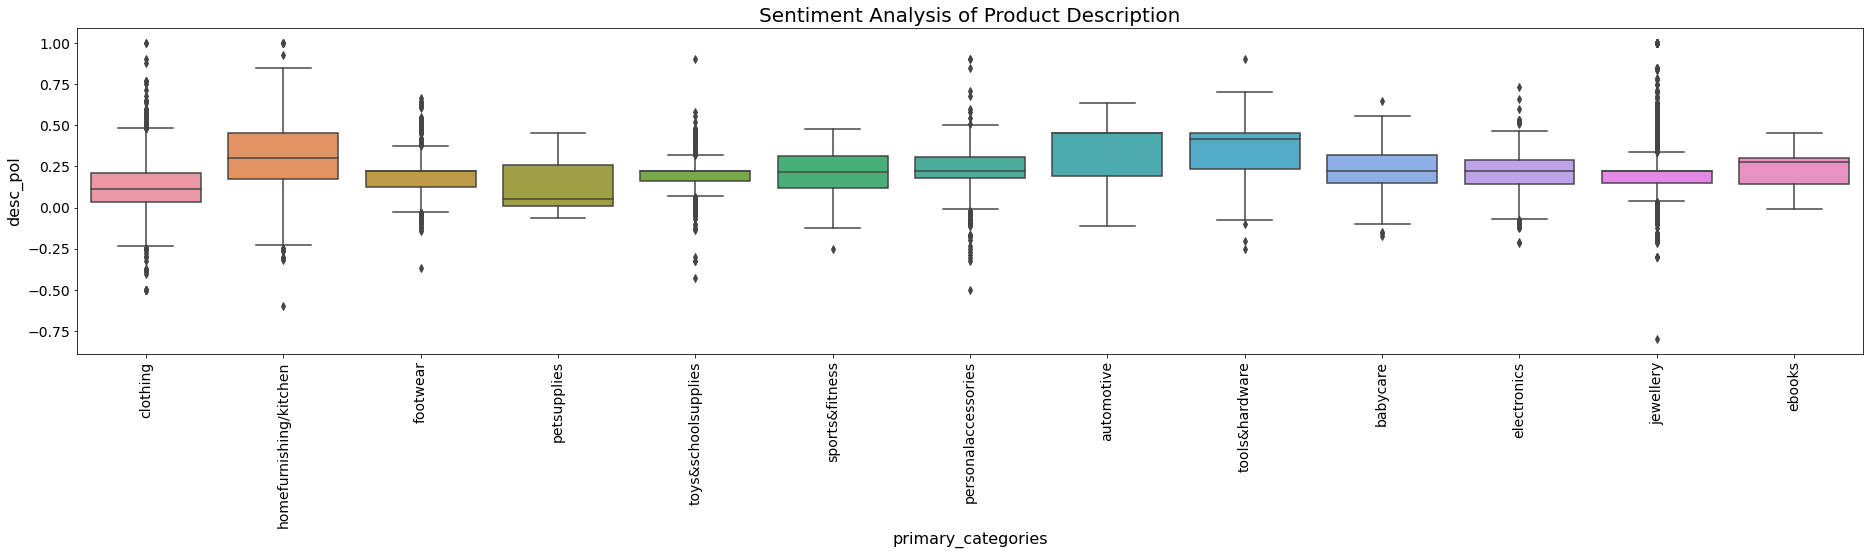

In [32]:
product_df['desc_pol']=product_df['description'].apply(lambda x : TextBlob(x).sentiment.polarity)

plt.figure(figsize=(32,6))
plt.title("Sentiment Analysis of Product Description", fontsize=20)
plt.xlabel("Polarity", fontsize=16)
plt.ylabel("Product Description", fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
sns.boxplot(x="primary_categories", y='desc_pol', data=product_df[product_df['main_category']==1])

# 4. Text Length Analysis

Analysis of the length of the Product Description is done to help us get an idea about the minimum, maximum and average length of the same. This is done in order to decide whether we have to discard some datapoints having text length less than or greater to a threshold.



In [33]:
# Finding the length of the description
max_desc_len = -1
desc_len_sum = 0
min_desc_len = maxsize

product_description = product_df["description"].tolist()

for i in range(len(product_description)):
    
    try:
        
        max_desc_len = max(max_desc_len,len(product_description[i]))
        min_desc_len = min(min_desc_len,len(product_description[i]))
        desc_len_sum+=len(product_description[i])
    except:
        pass

print("Max description length is {}.".format(max_desc_len))
print("Min description length is {}.".format(min_desc_len))
print("Average description length is {}.".format(desc_len_sum/len(product_description)))

Max description length is 5351.
Min description length is 3.
Average description length is 431.99189959497977.


### 4.1 Visualization of the Minimum description length across all the categories

From the graph below we can see that there are discrepancies in the minimum length across all the categories. pet supplies and ebooks have a minimum length almost greater than 180 while clothing has the minimum length.

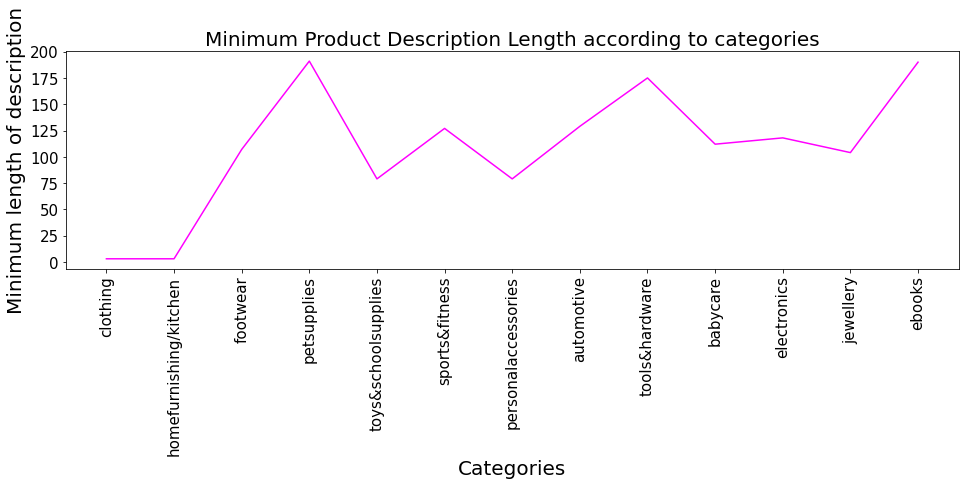

In [34]:
min_len = []
x = []

for category in temp_categories:
    temp_df = product_df[product_df["primary_categories"]==category]
    temp_df = temp_df[temp_df["main_category"]==1]
    try:    
        temp_min_len = min(temp_df["description"].str.len())
        x.append(category)
        min_len.append(temp_min_len)
    except:
        pass

plt.figure(figsize=(16,4))
plt.title("Minimum Product Description Length according to categories", fontsize=20)
plt.ylabel("Minimum length of description", fontsize=20)
plt.xlabel("Categories", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.plot(x,min_len, color = "magenta")

plt.show()

### 4.3 Visualization of the Maximum description length across all the categories

From the graph below we can see that almost all the product description lengths are greater than 2000 with jewellary category having the greatest length for product description (greater than 5000)

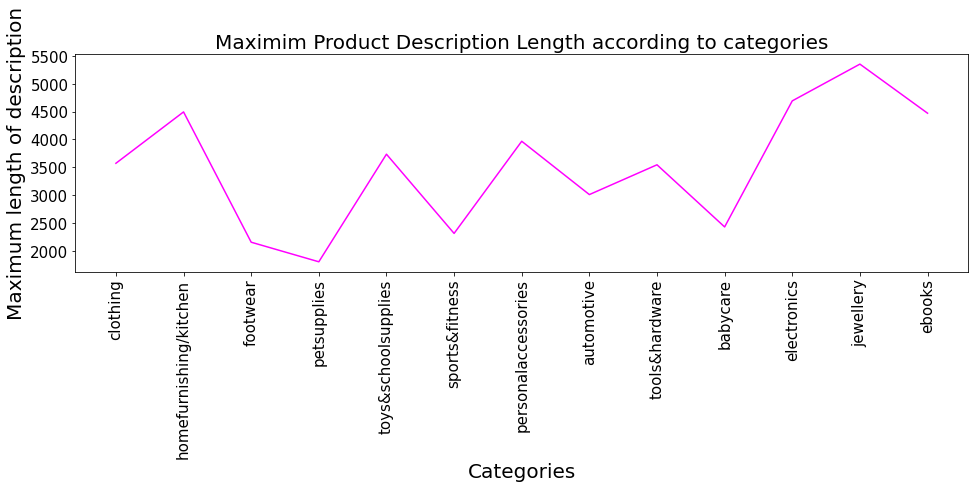

In [35]:
max_len = []
x = []

for category in temp_categories:
    
    temp_df = product_df[product_df["primary_categories"]==category]
    temp_df = temp_df[temp_df["main_category"]==1]
    try:
        temp_max_len = max(temp_df["description"].str.len())
        x.append(category)
        max_len.append(temp_max_len)
    except:
        pass

plt.figure(figsize=(16,4))
plt.title("Maximim Product Description Length according to categories", fontsize=20)
plt.ylabel("Maximum length of description", fontsize=20)
plt.xlabel("Categories", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.plot(x,max_len, color = "magenta")

plt.show()

### 4.4 Boxplot of the Average description length across all the categories

From the boxplot, we can see that the average length for all the categories lies more or less around 1000 words. I decided to not go with a certain minimum/maximum words threshold to prevent loss of information.

<AxesSubplot:title={'center':'Product Description Length according to categories'}, xlabel='primary_categories', ylabel='desc_len'>

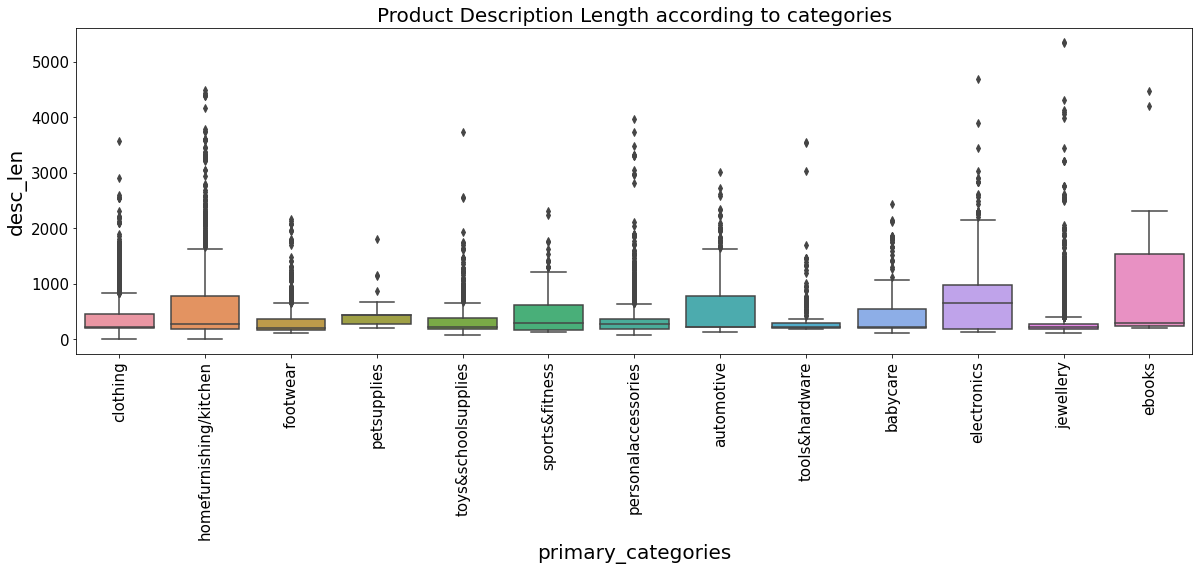

In [36]:
product_df["desc_len"] = product_df["description"].str.len()

plt.figure(figsize=(20,6))
plt.title("Product Description Length according to categories", fontsize=20)
plt.ylabel("Average of length of description", fontsize=20)
plt.xlabel("Number of Categories", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
sns.boxplot(x="primary_categories", y='desc_len', data=product_df[product_df['main_category']==1])

# 5. Data Cleaning and Preprocessing

### 5.1 Character Contraction

Character contraction is done to look at what percentage of the dataset is in English Characters. Punctuations, numbers, hyperlinks, etc will all be removed during further cleaning of the dataset.

During this analysis of the characters, we can see that there are several emoticons, letters from different languages (Chinese), etc that can be seen. These are then removed from the corpus.

In [37]:
corpus = ' '.join(product_df['description']).lower()
characters = Counter(corpus)
sorted(characters.items(), key=lambda i: i[1], reverse=True)

total=0
for i in ascii_letters+punctuation+digits:
    
    total+=characters[i]

print("The % of data consisting of only English Characters is {}.".format(100*total/len(' '.join(products['description']))))
print("\n")
print(characters)

The % of data consisting of only English Characters is 82.20710108917427.


Counter({' ': 1463524, 'e': 740769, 'a': 542608, 'o': 508932, 't': 479106, 'r': 474350, 'i': 473205, 'n': 438984, 's': 430648, 'l': 377665, 'c': 289702, 'd': 239870, 'h': 211222, 'p': 208643, 'u': 196226, 'f': 177742, 'm': 174353, 'y': 156833, 'g': 150614, 'b': 122326, '.': 107075, 'w': 91777, 'k': 77388, 'v': 61038, ',': 45271, '0': 35204, '1': 30032, '-': 30024, '\t': 28816, '9': 25362, '\r': 23211, '\n': 23211, '3': 21407, '2': 20015, ':': 19765, '5': 16747, 'x': 16097, "'": 15831, '4': 14062, 'j': 11636, 'z': 11241, '8': 8703, ')': 8639, '6': 8475, '(': 8370, 'q': 7755, '7': 7438, '!': 7427, '&': 6395, '/': 4465, '"': 1542, '%': 1302, '_': 1005, '*': 769, '#': 672, '’': 571, ';': 432, '•': 425, '?': 416, '+': 378, '|': 241, '=': 197, '@': 169, 'é': 138, '”': 119, '�': 87, '“': 86, '–': 73, 'â': 72, '¢': 43, '®': 42, '…': 39, '°': 36, '\x80': 35, ']': 21, 'ã': 21, '[': 18, '✔': 15, '‘': 14, '\\': 13, '±': 12

In [38]:
# getting all the words ending an apostrophe and single letter
contractions = Counter(re.findall("[a-z]+'[a-z]+", corpus))
apostrophe_end = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_end)

# getting all the words starting with a single letter and an apostrophe
contractions=Counter(re.findall("[a-z]'[a-z]+", corpus))
apostrophe_start = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_start)

#getting all the URLS
urls = re.findall('\(*http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))*', corpus)
print("\n")
print(urls)



[("women's", 7974), ("men's", 3608), ("girl's", 1123), ("boy's", 873), ("don't", 181), ("you're", 141), ("it's", 107), ("product's", 96), ("doesn't", 54), ("customer's", 48), ("nod'r", 43), ("they're", 39), ("you'll", 37), ("can't", 32), ("bra's", 31), ("ruhi's", 30), ("won't", 29), ("d'clair", 26), ("manufacturer's", 25), ("adapter's", 24), ("laptop's", 24), ("layer'r", 22), ("l'appel", 22), ("india's", 21), ("today's", 20), ("monitor's", 19), ("phone's", 18), ("woman's", 17), ("bras's", 16), ("car's", 15), ("baby's", 13), ("dede's", 13), ("kid's", 12), ("you'd", 11), ("jerry's", 11), ("world's", 10), ("company's", 10), ("l'elegantae", 10), ("model's", 9), ("scheffer's", 9), ("combo's", 9), ("what's", 8), ("wellworth's", 8), ("one's", 8), ("child's", 8), ("lord's", 8), ("computer's", 8), ("vehicle's", 7), ("finger's", 7), ("ona's", 7), ("seema's", 7), ("viewer's", 7), ("there's", 7), ("buyer's", 7), ("man's", 6), ("shirt's", 6), ("aren't", 6), ("i'm", 6), ("chef'n", 6), ("kb's", 6),

In [39]:
custom_contracts = {
    "women's" : "women",
    "men's" : "men",
    "girl's" : "girl",
    "boy's" : "boy",
    "don't" : "do not",
    "product's" : "product",
    "it's" : "its",
    "bra's" : "bras",
    "won't": "will not",
    "doesn't" : "does not",
    "l's" : " ",
    "n's" : " ",
    "y's" : " ",
    "n't" : "not",
    "r's" : "rs",
    "u're" : "your",
    "a's" : " ",
    "e's": " "
}

custom_stopwords = [w for w in set(stopwords.words("english"))]
custom_stopwords += list(punctuation)
stopwords_dataset = ["replacement","shipping","delivery","cash", "rs", "flipkart", "genuine", "details", "guarantee","free", "genuine", "flipkart.com"]
custom_stopwords.extend(stopwords_dataset)
wordnet_lemmatizer = WordNetLemmatizer()

In the following code snippet, the following things have been taken care of:

Lowercasing
Custom Contraction Mapping
Keeping only the ascii characters in the corpus
Removal of URLs/ Hyperlinks
Removal of numbers and punctuations
Custom Stopword Removal
Lemmatization
Removal of extra whitespaces

In [40]:
def clean(text):
    for i in range(len(text)):
        text[i] = text[i].lower()
        text[i] = text[i].replace("\n"," ")
        for keys,values in custom_contracts.items():
            text[i] = text[i].replace(keys,values)
        text[i] = re.sub("[a-z]'[a-z]+", " ", text[i])
        #removing the extra whitespaces
        text[i] = re.sub(' +', ' ', text[i])
        #keeping only the ascii characters -> handles emoticons, letters from other languages, etc
        text[i] = re.sub(r'[^\x00-\x7F]+',' ', text[i])
        #removing the urls
        text[i] = re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text[i])
        text[i] = ''.join([j for j in text[i] if not j.isdigit()])
        text[i] = text[i].split()
        text[i] = ' '.join([word for word in text[i] if word not in custom_stopwords])
        #removing the punctuations
        text[i] = re.sub(r'[^\w\s]', '', text[i])
        #lemmatization
        text[i] = [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text[i])]
        #removing the words which have a length less than 3
        text[i] = [word for word in text[i] if len(word)>=3]
  
    return text

raw_description = product_df["description"].tolist()
cleaned_description = clean(raw_description)
print(cleaned_description[:5])

[['key', 'feature', 'alisha', 'solid', 'woman', 'cycling', 'short', 'cotton', 'lycra', 'navy', 'red', 'navyspecifications', 'alisha', 'solid', 'woman', 'cycling', 'short', 'short', 'number', 'content', 'sale', 'package', 'pack', 'fabric', 'cotton', 'lycra', 'type', 'cycling', 'short', 'general', 'pattern', 'solid', 'ideal', 'woman', 'fabric', 'care', 'gentle', 'machine', 'wash', 'lukewarm', 'water', 'bleach', 'additional', 'style', 'code', 'altht_p_', 'box', 'short'], ['fabhomedecor', 'fabric', 'double', 'sofa', 'bed', 'finish', 'color', 'leatherette', 'black', 'mechanism', 'type', 'pull', 'out', 'price', 'fine', 'deep', 'seating', 'experience', 'save', 'space', 'new', 'click', 'clack', 'sofa', 'bed', 'easy', 'fold', 'vice', 'versa', 'simple', 'click', 'clack', 'mechanism', 'chrome', 'leg', 'mango', 'wood', 'frame', 'long', 'term', 'durability', 'double', 'cushioned', 'sofa', 'bed', 'provide', 'extra', 'softness', 'make', 'fine', 'seating', 'experience', 'double', 'bed', 'easily', 'sle

# 6. Visualisation of the cleaned Dataset

### 6.1 Visualisation of the most common words

40 most common words are plotted in the form of a bargraph after removal of the unnecessary data. From the bargraph, we can clearly see that these are the words which actually can help us in identifying the particular category of a product.

<AxesSubplot:title={'center':'40 Most Common Words relevant to Dataset'}, xlabel='Frequency', ylabel='Words'>

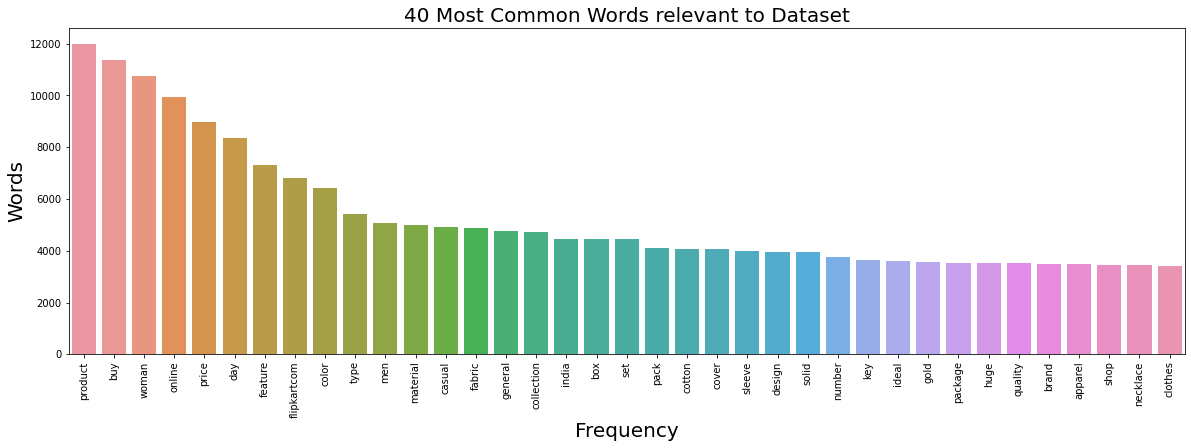

In [41]:
corpus = []
for text in cleaned_description:
    for word in text:
        corpus.append(word)

counter = Counter(corpus)
most=counter.most_common()
x, y = [], []
for word,count in most[:40]:
      if (word not in custom_stopwords):
        x.append(word)
        y.append(count)

plt.figure(figsize=(20,6))
plt.title("40 Most Common Words relevant to Dataset", fontsize=20)
plt.ylabel("Words", fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.xticks(rotation=90)            
sns.barplot(x=x,y=y)

In [42]:
temp_cleaned_description = [" ".join(sentence) for sentence in cleaned_description]
product_df["cleaned_desc"] = temp_cleaned_description
product_df.head(10)

,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.143750,410,key feature alisha solid woman cycling short c...
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.113814,4433,fabhomedecor fabric double sofa bed finish col...
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1,0.027778,650,key feature belly sandal wedge heel casualsaw ...
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.122917,403,key feature alisha solid woman cycling short c...
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1,0.050000,248,specification sicons purpose arnica dog shampo...
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,eternalgandhisuperseriescrystalpaperweight...,0,0.322727,872,key feature eternal gandhi super series crysta...
6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.127778,416,key feature alisha solid woman cycling short c...
7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.135063,4385,fabhomedecor fabric double sofa bed finish col...
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,1,-0.032143,428,key feature dilli bazaaar belly corporate casu...
9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.098333,419,key feature alisha solid woman cycling short c...


### 6.2 Converting the Primary Category of all Noise datapoints into Noise label

For all the rows in the dataframe where the Main Category is 0 (i.e. noise), then the primary_category label is updated to "noise". This is done to ease the process of plotting the TSNE graphs.

In [43]:
product_df.loc[product_df['main_category'] == 0, 'primary_categories'] = "noise"
product_df.sample(10)

,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
3699,Rockmantra Glowing Brige In The Night Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Rockmantr...",Rockmantra Glowing Brige In The Night Ceramic ...,NaN,homefurnishing/kitchen,1,0.550000,783,rockmantra glowing brige night ceramic mug pri...
5733,Hi Look Alloy Necklace,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",Hi Look Alloy Necklace - Buy Hi Look Alloy Nec...,Hi Look,jewellery,1,0.225000,173,look alloy necklace buy look alloy necklace fl...
19161,JK Cartridge 85a Black Toner,"[""Computers >> Computer Peripherals >> Printer...",JK Cartridge 85a Black Toner (Black)\r\n ...,JK Cartridge,electronics,1,0.222222,632,cartridge black toner black price cartrige bla...
6275,Galz4ever Multi Seed Bead Alloy Necklace,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",Galz4ever Multi Seed Bead Alloy Necklace - Buy...,Galz4ever,jewellery,1,0.225000,209,galzever multi seed bead alloy necklace buy ga...
14733,Elligator 10 Card Holder,"[""Bags, Wallets & Belts >> Wallets & Clutches ...",Flipkart.com: Buy Elligator 10 Card Holder onl...,NaN,personalaccessories,1,0.225000,164,flipkartcom buy elligator card holder flipkart...
16919,Thelostpuppy Book Cover for Apple iPad Air,"[""Mobiles & Accessories >> Tablet Accessories ...",Thelostpuppy Book Cover for Apple iPad Air (Mu...,Thelostpuppy,electronics,1,0.519048,643,thelostpuppy book cover apple ipad air multico...
6113,Ski Fancy School Art Plastic Pencil Box,"[""Pens & Stationery >> School Supplies >> Geom...",Flipkart.com: Buy Ski Fancy School Art Plastic...,NaN,toys&schoolsupplies,1,0.225000,179,flipkartcom buy ski fancy school art plastic p...
9541,Oasis Wayfarer Sunglasses,"[""Sunglasses""]",Oasis Wayfarer Sunglasses\r\n ...,NaN,personalaccessories,1,0.166667,175,oasis wayfarer sunglass price wayfarer vibrant...
16684,Kristino Men's Solid Formal Shirt,"[""Clothing >> Men's Clothing >> Shirts >> Form...",Kristino Men's Solid Formal Shirt\r\n ...,Regular,clothing,1,0.000000,97,kristino men solid formal shirt price solid solid
4193,"Vinnis Bella Fabric, Alloy Necklace","[""Jewellery >> Necklaces & Chains >> Necklaces""]","Vinnis Bella Fabric, Alloy Necklace - Buy Vinn...",Vinnis,jewellery,1,0.225000,199,vinnis bella fabric alloy necklace buy vinnis ...


### 6.3 Visualization of the Overlapping of classes using TSNE Plots

TSNE Plots are plotted after creating the Product Description's vectors. This helps us in visualization by reducing the 13 dimensional plot into a 2 dimensional plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

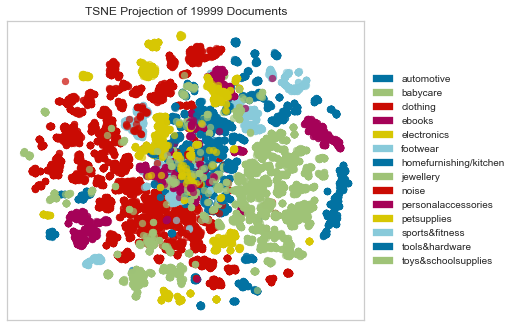

In [44]:
# Creating the document vectors
tfidf = TfidfVectorizer()

description = tfidf.fit_transform(product_df["cleaned_desc"])
categories_ = product_df["primary_categories"]

# creating the visualizer
tsne = TSNEVisualizer()
tsne.fit_transform(description, categories_)
tsne.poof()
plt.show()

### 6.4. Dataframe consisting of categories and their counts

The following is a dataframe consisting of the frequency of the products and the 13 major categories listed before along with the noise in the dataset.

In [45]:
temp_categories = {'primary_category':categories, 'count':frequency}


temp_categories['primary_category'].append('noise')
temp_categories['count'].append(len(noise))
category_df = pd.DataFrame(temp_categories)
category_df = category_df.sort_values(by = 'count', ascending=False)
category_df = category_df.reset_index(drop=True)
category_df

,primary_category,count
0,clothing,6198
1,jewellery,3531
2,homefurnishing/kitchen,2580
3,electronics,1794
4,personalaccessories,1598
5,footwear,1227
6,automotive,1012
7,toys&schoolsupplies,643
8,babycare,482
9,tools&hardware,391


This preprocessed unbalanced dataset is then saved as a csv file for further training. The unbalanced dataset also contains noise in order to check the working of our model on a datset having sufficient noise as well.

# 7. Balancing out the Dataset

From the above plotted bar graphs and the dataframe, we could see that the dataset is very imbalanced with more than half of the dataset residing in clothing and jewellary categories. 2 of the following dataset balancing techniques are adopted in order to ensure that there is an almost equal frequency of products for each major product category (in order to train an unbiased model and increase the accuracy).

Oversampling
Undersampling

## 7.1 Oversampling

Random oversampling of the minority classes (i.e. classes apart from clothing and jewellery) is implemented below.

In [47]:
# A copy of the unbalanced dataset is made on which further work is done
balanced_df = product_df.copy(deep=True)
undersample_df= product_df.copy(deep=True)
balanced_df.head()

,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.143750,410,key feature alisha solid woman cycling short c...
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.113814,4433,fabhomedecor fabric double sofa bed finish col...
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1,0.027778,650,key feature belly sandal wedge heel casualsaw ...
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.122917,403,key feature alisha solid woman cycling short c...
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1,0.050000,248,specification sicons purpose arnica dog shampo...


Only the 13 major categories are considered and the 237 datapoints classified as noise are also removed from the dataset. This is done to help increase the accuracy of the model that will be trained further. Around 3000 samples for each category is considered in the final oversampled dataset.

In [48]:
balanced_df = balanced_df.loc[balanced_df['main_category'] == 1]

final_balanced_df = {category: balanced_df[balanced_df['primary_categories']==category] for category in set(balanced_df['primary_categories'])}

train_df = pd.concat([resample(data, n_samples=3000, replace=True, random_state=42) for data in final_balanced_df.values()])
train_df

,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
1612,Creative Spinach Blue Lion Fish Aquarium Toy S...,"[""Pet Supplies >> Toys >> Comfort Toys""]",Buy Creative Spinach Blue Lion Fish Aquarium T...,Creative Spinach,petsupplies,1,0.350000,277,buy creative spinach blue lion fish aquarium t...
18313,Pawzone Round Stainless Steel Pet Bowl,"[""Pet Supplies >> Storage & Feeding Utensils >...",Specifications of Pawzone Round Stainless Stee...,Pawzone,petsupplies,1,0.040909,358,specification pawzone round stainless steel pe...
18335,Pawzone Round Stainless Steel Pet Bowl,"[""Pet Supplies >> Storage & Feeding Utensils >...",Key Features of Pawzone Round Stainless Steel ...,Pawzone,petsupplies,1,-0.042857,436,key feature pawzone round stainless steel pet ...
17897,Royal Canin Maxi Starter 1kg Vegetable Dog Food,"[""Pet Supplies >> Food & Health Supplies >> Fo...",Specifications of Royal Canin Maxi Starter 1kg...,Royal Canin,petsupplies,1,0.158333,261,specification royal canin maxi starter vegetab...
11402,Ocean Free Sponge Aquarium Filter,"[""Pet Supplies >> Habitat >> Habitat Essential...",Buy Ocean Free Sponge Aquarium Filter for Rs.1...,Ocean Free,petsupplies,1,0.433333,197,buy ocean sponge aquarium filter online ocean ...
...,...,...,...,...,...,...,...,...,...
15598,Lilliput Solid Baby Boy's Three Fourths,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",Key Features of Lilliput Solid Baby Boy's Thre...,Lilliput,babycare,1,-0.009015,950,key feature lilliput solid baby boy three four...
10378,Pokizo Baby Girl's A-line Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",Key Features of Pokizo Baby Girl's A-line Dres...,Pokizo,babycare,1,0.316667,244,key feature pokizo baby girl aline dress multi...
5379,Babeezworld Baby Boy's Romper,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",Key Features of Babeezworld Baby Boy's Romper ...,Babeezworld,babycare,1,0.247388,828,key feature babeezworld baby boy romper fabric...
19145,Toons Printed Baby Boy's Round Neck T-Shirt,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",Key Features of Toons Printed Baby Boy's Round...,Toons,babycare,1,0.203900,1058,key feature toon printed baby boy round neck t...


In [49]:
train_df.to_csv('oversample_df.csv')

In [83]:
train_df.head(5)

,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
1612,Creative Spinach Blue Lion Fish Aquarium Toy S...,"[""Pet Supplies >> Toys >> Comfort Toys""]",Buy Creative Spinach Blue Lion Fish Aquarium T...,Creative Spinach,petsupplies,1,0.350000,277,buy creative spinach blue lion fish aquarium t...
18313,Pawzone Round Stainless Steel Pet Bowl,"[""Pet Supplies >> Storage & Feeding Utensils >...",Specifications of Pawzone Round Stainless Stee...,Pawzone,petsupplies,1,0.040909,358,specification pawzone round stainless steel pe...
18335,Pawzone Round Stainless Steel Pet Bowl,"[""Pet Supplies >> Storage & Feeding Utensils >...",Key Features of Pawzone Round Stainless Steel ...,Pawzone,petsupplies,1,-0.042857,436,key feature pawzone round stainless steel pet ...
17897,Royal Canin Maxi Starter 1kg Vegetable Dog Food,"[""Pet Supplies >> Food & Health Supplies >> Fo...",Specifications of Royal Canin Maxi Starter 1kg...,Royal Canin,petsupplies,1,0.158333,261,specification royal canin maxi starter vegetab...
11402,Ocean Free Sponge Aquarium Filter,"[""Pet Supplies >> Habitat >> Habitat Essential...",Buy Ocean Free Sponge Aquarium Filter for Rs.1...,Ocean Free,petsupplies,1,0.433333,197,buy ocean sponge aquarium filter online ocean ...


Dataframe showing the count of the new oversampled datapoints

In [50]:
temp_balanced_categories = {'primary_category':[], 'count':[]}

for category in categories:
    count = np.sum(train_df.loc[:, 'primary_categories'].values == category)
    temp_balanced_categories['primary_category'].append(category)
    temp_balanced_categories['count'].append(count)

category_balanced_df = pd.DataFrame(temp_balanced_categories)
category_balanced_df = category_balanced_df.sort_values(by = 'count', ascending=False)
category_balanced_df = category_balanced_df.reset_index(drop=True)
category_balanced_df

,primary_category,count
0,clothing,3000
1,homefurnishing/kitchen,3000
2,footwear,3000
3,petsupplies,3000
4,toys&schoolsupplies,3000
5,sports&fitness,3000
6,personalaccessories,3000
7,automotive,3000
8,tools&hardware,3000
9,babycare,3000


## 7.2 Under Sampling

Random undersampling of the majority classes (i.e. clothing and jewellary) is implemented below.

In [51]:
undersample_df

,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.143750,410,key feature alisha solid woman cycling short c...
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.113814,4433,fabhomedecor fabric double sofa bed finish col...
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1,0.027778,650,key feature belly sandal wedge heel casualsaw ...
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.122917,403,key feature alisha solid woman cycling short c...
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1,0.050000,248,specification sicons purpose arnica dog shampo...
...,...,...,...,...,...,...,...,...,...
19994,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,babycare,1,0.371429,209,buy wallmantra large vinyl sticker sticker onl...
19995,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign,babycare,1,0.216667,191,buy walldesign small vinyl sticker online wall...
19996,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,babycare,1,0.371429,210,buy wallmantra large vinyl sticker sticker onl...
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,babycare,1,0.450000,209,buy elite collection medium acrylic sticker on...


In [52]:
# the datapoints are separated out into jewellary, clothing and non jewellary and clothing entries

jewellary_df = undersample_df.loc[undersample_df['primary_categories'] == 'jewellery']
clothing_df = undersample_df.loc[undersample_df['primary_categories'] == 'clothing']
not_jewellary_clothing = undersample_df.loc[undersample_df['primary_categories'] != 'clothing']
not_jewellary_clothing = not_jewellary_clothing.loc[not_jewellary_clothing['primary_categories'] != 'jewellery']
not_jewellary_clothing = not_jewellary_clothing.loc[not_jewellary_clothing['main_category'] == 1]

print(jewellary_df.shape, clothing_df.shape, not_jewellary_clothing.shape)

(3531, 9) (6198, 9) (9938, 9)


Only the 13 major categories are considered and the 237 datapoints classified as noise are also removed from the dataset. This is done to help increase the accuracy of the model that will be trained further. Around 1700 samples for clothing and jewellary categories are considered in the final undersampled dataset. This number is chosen by keeping the frequency of the other categories in mind while trying not to lose useful information during undersampling.

In [53]:
clothing_down = resample(clothing_df, replace = False, n_samples = 1700, random_state = 42)
jewellary_down = resample(jewellary_df, replace = False, n_samples = 1700, random_state = 42)

print(clothing_down.shape, jewellary_down.shape)

(1700, 9) (1700, 9)


In [54]:
undersampled_bal = pd.concat([clothing_down, jewellary_down, not_jewellary_clothing])
undersampled_bal = undersampled_bal.reset_index(drop=True)
undersampled_bal.head()

,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,Just Wow Women's A-line Dress,"[""Clothing >> Women's Clothing >> Western Wear...",Just Wow Women's A-line Dress - Buy Black Just...,NaN,clothing,1,7.222222e-02,188,wow woman aline dress buy black wow woman alin...
1,Orange Valley Men's Solid Casual Shirt,"[""Clothing >> Men's Clothing >> Shirts >> Casu...",Orange Valley Men's Solid Casual Shirt\r\n ...,Slim,clothing,1,1.666667e-02,252,orange valley men solid casual shirt price ora...
2,Happy Hippie Casual Full Sleeve Solid Women's Top,"[""Clothing >> Women's Clothing >> Western Wear...",Happy Hippie Casual Full Sleeve Solid Women's ...,NaN,clothing,1,1.809524e-01,228,happy hippie casual full sleeve solid woman to...
3,Northern Lights Solid Men's Round Neck T-Shirt,"[""Clothing >> Men's Clothing >> T-Shirts >> No...",Northern Lights Solid Men's Round Neck T-Shirt...,NaN,clothing,1,6.167906e-18,233,northern light solid men round neck tshirt buy...
4,SK Dreams Fashion Women's Full Coverage Bra,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SK Dreams Fashion Women's Full Coverage Bra - ...,Multicolor,clothing,1,2.200000e-01,220,dream fashion woman full coverage bra buy mult...


### 7.3 Dataframe showing the count of the new undersampled datapoints

In [55]:
temp_undersampled = {'primary_category':[], 'count':[] }

for category in categories:
    count = np.sum(undersampled_bal.loc[:, 'primary_categories'].values == category)
    temp_undersampled['primary_category'].append(category)
    temp_undersampled['count'].append(count)

underbalanced_count = pd.DataFrame(temp_undersampled)
underbalanced_count = underbalanced_count.sort_values(by = 'count', ascending=False)
underbalanced_count = underbalanced_count.reset_index(drop=True)
underbalanced_count

,primary_category,count
0,homefurnishing/kitchen,2580
1,electronics,1794
2,clothing,1700
3,jewellery,1700
4,personalaccessories,1598
5,footwear,1227
6,automotive,1012
7,toys&schoolsupplies,643
8,babycare,482
9,tools&hardware,391


# 8. Machine Learning Models for Product Categorization

In [56]:
oversample_df = pd.read_csv("oversample_df.csv")
oversample_df

,Unnamed: 0,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,1612,Creative Spinach Blue Lion Fish Aquarium Toy S...,"[""Pet Supplies >> Toys >> Comfort Toys""]",Buy Creative Spinach Blue Lion Fish Aquarium T...,Creative Spinach,petsupplies,1,0.350000,277,buy creative spinach blue lion fish aquarium t...
1,18313,Pawzone Round Stainless Steel Pet Bowl,"[""Pet Supplies >> Storage & Feeding Utensils >...",Specifications of Pawzone Round Stainless Stee...,Pawzone,petsupplies,1,0.040909,358,specification pawzone round stainless steel pe...
2,18335,Pawzone Round Stainless Steel Pet Bowl,"[""Pet Supplies >> Storage & Feeding Utensils >...",Key Features of Pawzone Round Stainless Steel ...,Pawzone,petsupplies,1,-0.042857,436,key feature pawzone round stainless steel pet ...
3,17897,Royal Canin Maxi Starter 1kg Vegetable Dog Food,"[""Pet Supplies >> Food & Health Supplies >> Fo...",Specifications of Royal Canin Maxi Starter 1kg...,Royal Canin,petsupplies,1,0.158333,261,specification royal canin maxi starter vegetab...
4,11402,Ocean Free Sponge Aquarium Filter,"[""Pet Supplies >> Habitat >> Habitat Essential...",Buy Ocean Free Sponge Aquarium Filter for Rs.1...,Ocean Free,petsupplies,1,0.433333,197,buy ocean sponge aquarium filter online ocean ...
...,...,...,...,...,...,...,...,...,...,...
38995,15598,Lilliput Solid Baby Boy's Three Fourths,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",Key Features of Lilliput Solid Baby Boy's Thre...,Lilliput,babycare,1,-0.009015,950,key feature lilliput solid baby boy three four...
38996,10378,Pokizo Baby Girl's A-line Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",Key Features of Pokizo Baby Girl's A-line Dres...,Pokizo,babycare,1,0.316667,244,key feature pokizo baby girl aline dress multi...
38997,5379,Babeezworld Baby Boy's Romper,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",Key Features of Babeezworld Baby Boy's Romper ...,Babeezworld,babycare,1,0.247388,828,key feature babeezworld baby boy romper fabric...
38998,19145,Toons Printed Baby Boy's Round Neck T-Shirt,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",Key Features of Toons Printed Baby Boy's Round...,Toons,babycare,1,0.203900,1058,key feature toon printed baby boy round neck t...


In [57]:
oversample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39000 entries, 0 to 38999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39000 non-null  int64  
 1   product_name           39000 non-null  object 
 2   product_category_tree  39000 non-null  object 
 3   description            38998 non-null  object 
 4   brand                  26961 non-null  object 
 5   primary_categories     39000 non-null  object 
 6   main_category          39000 non-null  int64  
 7   desc_pol               39000 non-null  float64
 8   desc_len               39000 non-null  int64  
 9   cleaned_desc           38998 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 3.0+ MB


In [58]:
oversample_df['cleaned_desc'] =oversample_df['cleaned_desc'].astype(str)
oversample_df['primary_categories'] =oversample_df['primary_categories'].astype(str)

## 8.1 Encoding of the Product Classes

In order to plot the ROC Curves and find the AUC score, there was a need to have a proper encoding for the 13 primary categories (in both directions). Hence, two of the following dictionaries are created to create a mapping.

In [59]:
# Helper dictionaries created which are later used to manipulate the testing output into suitable form before plotting the ROC Curves

category_mapping = {  0	: "homefurnishing/kitchen",
                      1	: "clothing",
                      2	: "jewellery",
                      3	: "personalaccessories",
                      4	: "electronics",
                      5	: "footwear",
                      6	: "automotive",
                      7	: "toys&schoolsupplies",
                      8	: "tools&hardware",
                      9	: "babycare",
                      10 : "sports&fitness",
                      11 : "petsupplies",
                      12 : "ebooks"}

reverse_category_mapping = {"homefurnishing/kitchen":0,
                            "clothing":1,
                            "jewellery":2,
                            "personalaccessories":3,
                            "electronics":4,
                            "footwear":5,
                            "automotive":6,
                            "toys&schoolsupplies":7,
                            "tools&hardware":8,
                            "babycare":9,
                            "sports&fitness":10,
                            "petsupplies":11,
                            "ebooks":12}

In [60]:
# Dropping the noise in the dataset by considering only the above mentioned categories

print(oversample_df.shape)
oversample_df = oversample_df[oversample_df["main_category"]==1]
print(oversample_df.shape)

(39000, 10)
(39000, 10)


## 8.2 Linear Support Vector Machine

In [61]:
def linear_svm(x,y):
    
  #splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test)

  #fitting the training dataset to the model
    svc_model = LinearSVC(random_state=42, max_iter=2000)
    svc_model.fit(x_train,y_train)
    svc_predict = svc_model.predict(x_test)

  #evaluation metrics for the dataset
    print("Validation Accuracy: ",accuracy_score(y_test, svc_predict))

    print("\n")
    print("*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test,svc_predict))

    print("\n")
    print("*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test,svc_predict))

    return y_test, svc_predict

### 8.3  Logistic Regression (Binary Classification Method)

In [63]:
def logistic_regression(x,y):

    #splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #bag of words implmentation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    #TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test)

    #fitting the training dataset to the model
    lr_model = LogisticRegression()
    lr_model.fit(x_train,y_train)
    lr_predict = lr_model.predict(x_test)
    lr_pred_prob = lr_model.predict_proba(x_test)

    #evaluation metrics for the dataset
    print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

    print("\n")
    print("*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test,lr_predict))

    print("\n")
    print("*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test,lr_predict))

    return y_test, lr_predict, lr_pred_prob

In [64]:
x = oversample_df['cleaned_desc']
y = oversample_df['primary_categories']

In [66]:
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9955128205128205


*********** CONFUSION MATRIX **************
[[567   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 612   2   0   0   0   0   0   0   0   0   0   0]
 [  0   2 555   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0 600   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 608   0   0   0   0   0   0   0]
 [  2  11   0   0   2   0 577   0   2   1   0   2   4]
 [  0   0   0   0   0   0   1 635   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0 608   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0 622   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 635   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 567   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 604]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.99      1.00      1

In [68]:
print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9758974358974359


*********** CONFUSION MATRIX **************
[[564   0   0   0   1   0   0   0   0   0   2   0   0]
 [  0 600   6   0   0   0   1   0   0   0   7   0   0]
 [  0  14 540   0   0   1   1   1   0   0   1   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0 598   0   0   0   0   0   1   0   2]
 [  0   0   0   0   0 607   0   0   0   0   1   0   0]
 [  2  47   0   1   5   2 507   1   2  14   4   8   8]
 [  0   0   0   0   0   0   1 627   3   0   4   1   0]
 [  1   1   3   0   0   1   3   2 584   0  13   0   3]
 [  0   0   0   0   0   0   0   0   0 622   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 635   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0 565   0]
 [  2   0   0   1   0   0   1   0   3   0   9   0 588]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.99      

## 8.4 Plotting the ROC Curves for Multiclass Logistic Regression


The ROC Curves are plotted and the corresponding AUC score for each of the categories has been plotted to get an idea about the accuracy of the model. Later, an aggregate AUC Score is also calculated which an average for all the categories' One VS Rest ROC Curves.

In [69]:
def plot_roc_curve(y_test, y_pred, no_categories = 13, lw=2):

  # Calculating the ROC curve and area for each class
    false_positive_rate = dict()
    true_positive_rate = dict()

    for i in range(no_categories):
        false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test[:,i], y_pred[:, i])

  # Compute micro-average ROC curve and area under the curve
        false_positive_rate["micro"], true_positive_rate["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())

  # Plotting the ROC Curves for each of the 13 main categories in our model
    for category in range(no_categories):
        plt.figure()
        plt.plot(false_positive_rate[category], 
             true_positive_rate[category], 
             color='deeppink',
             lw=lw)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Primary Category: ' + category_mapping[category])
        plt.show()


In [70]:
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (7800,)
PREDICTED LABELS: (7800,)
PROBABILITY OF THE PREDICTED LABELS: (7800, 13)


In [71]:
# Converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
    y_test[i] = reverse_category_mapping[y_test[i]]
    lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [1 6 9 4 0 5 10 8 3 7]
The last 10 predicted labels: [1 6 9 4 0 5 10 8 3 7]


In [72]:
# Converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
    temp_array[j][i] = 1
    j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


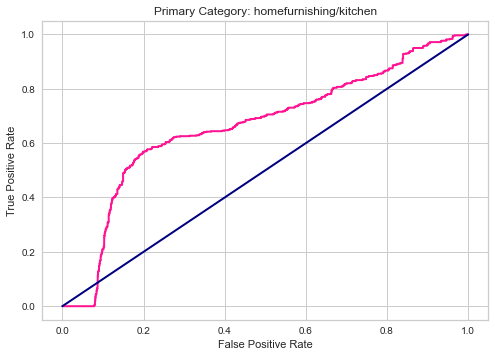

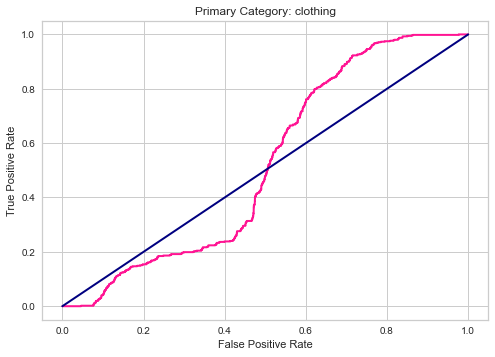

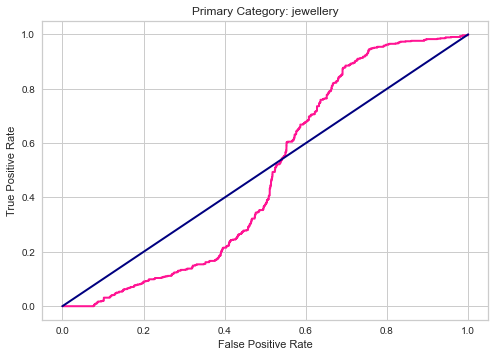

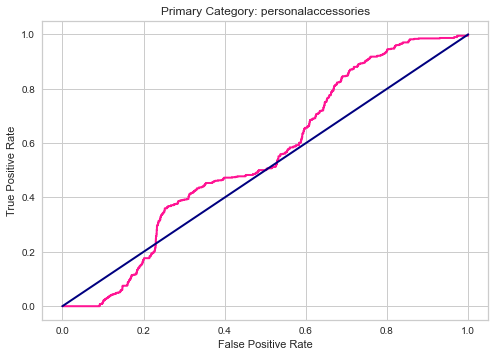

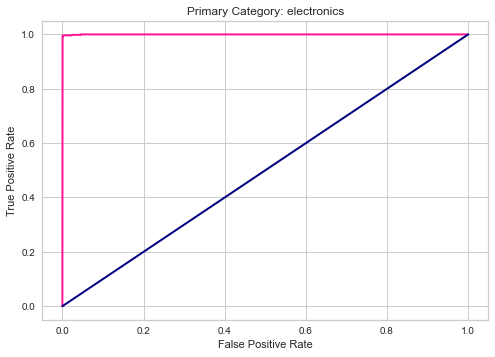

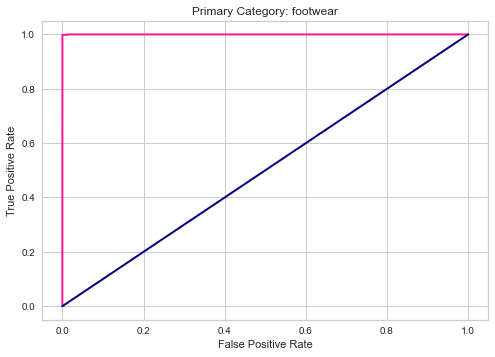

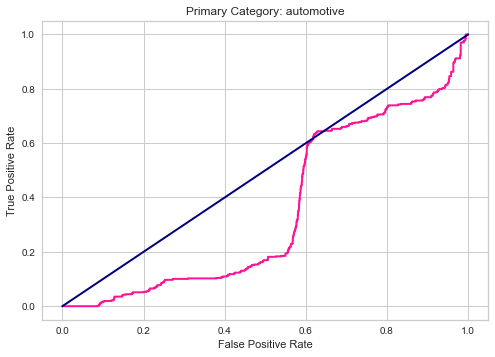

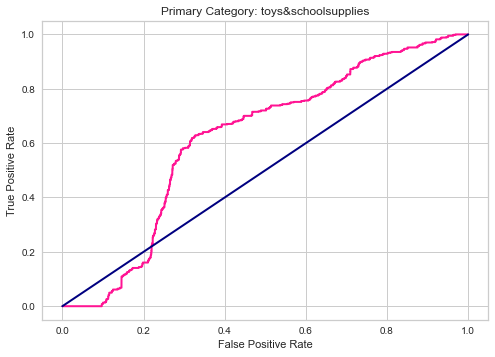

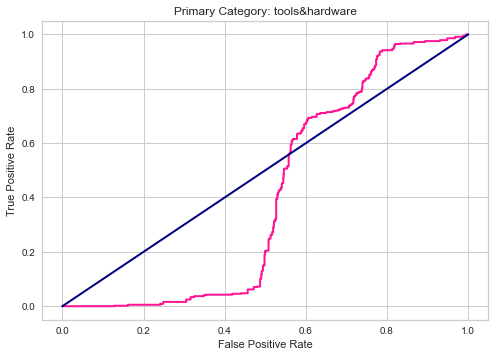

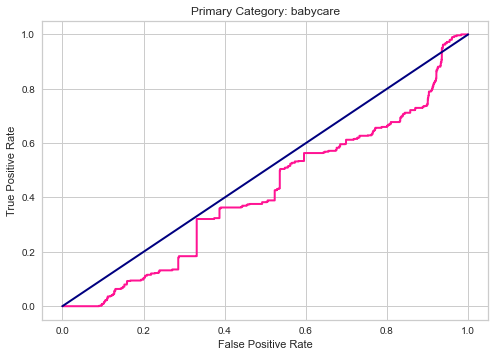

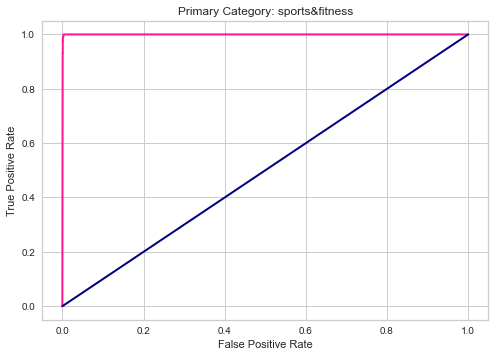

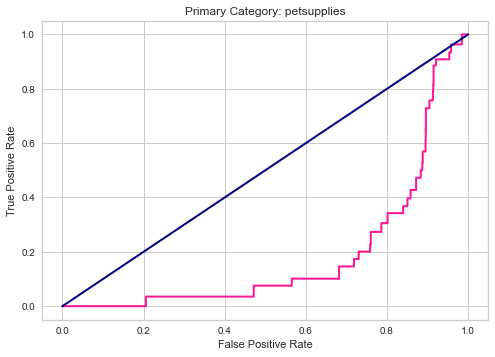

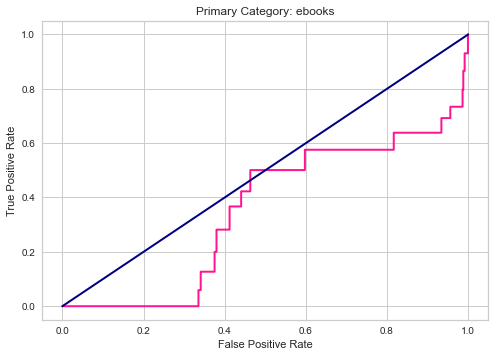

In [73]:
plot_roc_curve(y_test, lr_pred_prob)